# In-Class Example

Let's practice writing a solver for an ODE system.

We'll consider the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system).  This is a toy-model of atmospheric convection.  In a seminal paper, [Deterministic Nonperiodic Flow](https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml), Lorenz explored this system and showed that it exhibited [chaotic behavior](https://en.wikipedia.org/wiki/Chaos_theory).

The system can be expressed as:

\begin{align*}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (r - z) - y \\
\frac{dz}{dt} &= xy - b z 
\end{align*}

where $x$ is related to the intensity of the convective motion, $y$ is related to the temperature difference between up and down currents, and $z$ is related to the departure of the temperature profile from linear (with height).  The constants have the following meanings: $\sigma$ is the [Prandtl number](https://en.wikipedia.org/wiki/Prandtl_number), $r$ is the [Rayleigh number](https://en.wikipedia.org/wiki/Rayleigh_number) (scaled to the critical value), and $b$ is needed to define the critical Rayleigh number.

Lorenz chose $\sigma = 10$, $b = 8/3$, and $r = 28$

<div class="alert alert-block alert-info">

**Exercise:**
    
Evolve this system using 4th-order Runge-Kutta and explore how the solution changes with small perturbations to the initial conditions.
</div>

In [1]:
sigma = 10.0
b = 8./3.
r = 28.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rhs(xvec):
    x, y, z = xvec
    
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    
    return np.array([dxdt, dydt, dzdt])

In [4]:
def integrate(xvec0, dt_in, tmax):
    
    t = 0.0
    dt = dt_in
    
    times = [t]
    history = [np.array(xvec0)]
    
    while t < tmax:
        if t + dt > tmax:
            dt = tmax - t
        
        state_old = history[-1]
        
        k1 = rhs(state_old)
        k2 = rhs(state_old + 0.5 * dt * k1)
        k3 = rhs(state_old + 0.5 * dt * k2)
        k4 = rhs(state_old + dt * k3)
        
        state_new = state_old + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    
        t += dt
        
        times.append(t)
        history.append(state_new)
        
    return times, history

In [36]:
xvec0 = np.array([0.0, 0.1, 0.0])

tmax = 40.0
dt = 0.01

times, history = integrate(xvec0, dt, tmax)

In [37]:
xvec0 = np.array([0.0, 0.1001, 0.0])

tmax = 40.0
dt = 0.01

times2, history2 = integrate(xvec0, dt, tmax)

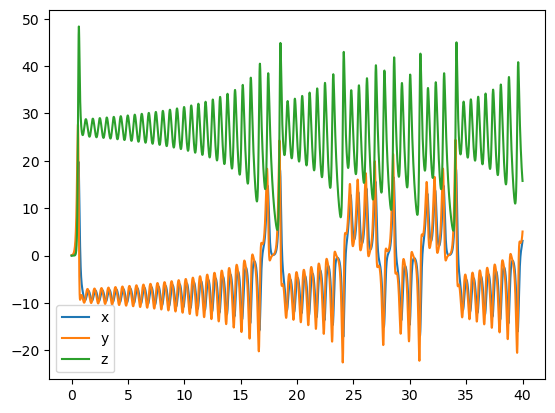

In [38]:
xs = [v[0] for v in history]
ys = [v[1] for v in history]
zs = [v[2] for v in history]

fig, ax = plt.subplots()
ax.plot(times, xs, label="x")
ax.plot(times, ys, label="y")
ax.plot(times, zs, label="z")

ax.legend()



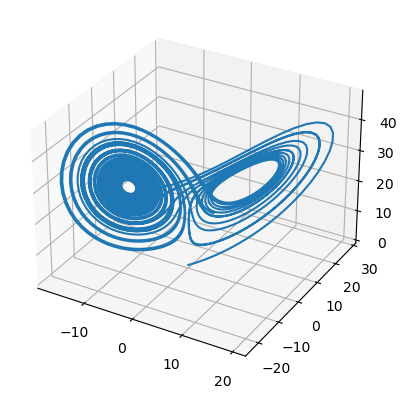

In [39]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xs, ys, zs)

In [40]:
xs2 = [v[0] for v in history2]
ys2 = [v[1] for v in history2]
zs2 = [v[2] for v in history2]

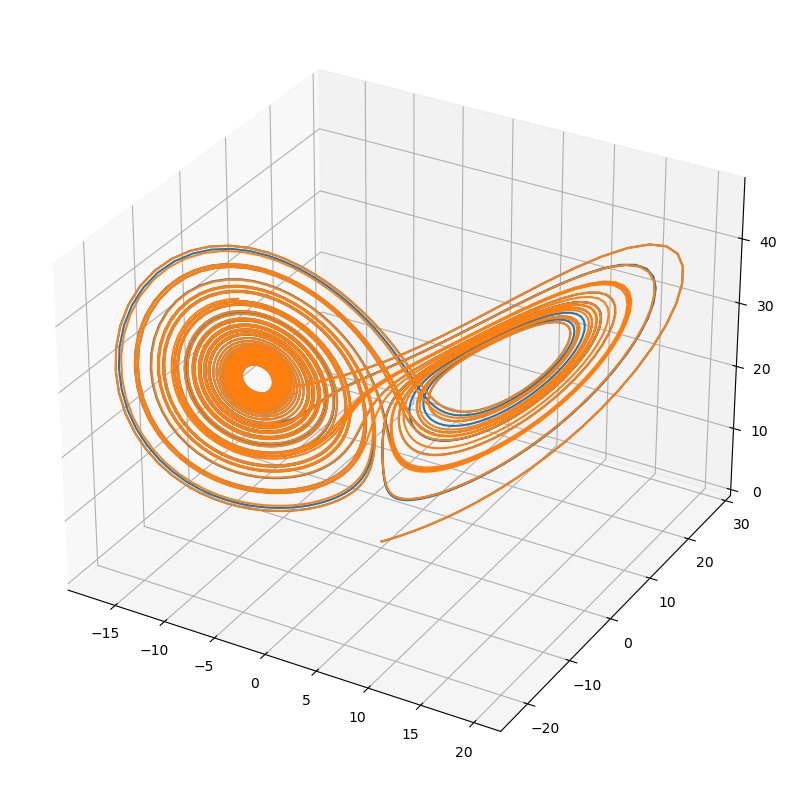

In [41]:
ax.plot(xs2, ys2, zs2)
fig.set_size_inches(10, 10)
fig

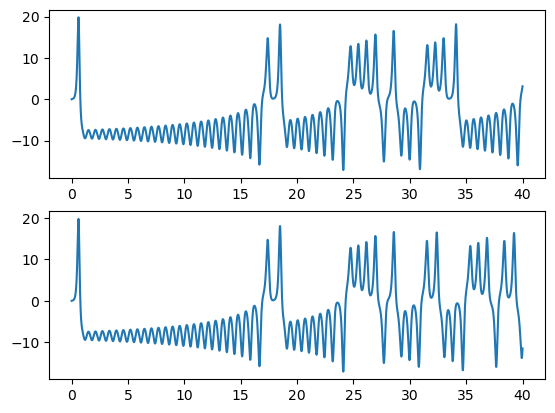

In [43]:
fig = plt.figure()
ax = fig.add_subplot(211)
ax.plot(times, xs)

ax = fig.add_subplot(212)
ax.plot(times2, xs2)